## what this script does
It takes a shortstack result dataframe and generate a barplot with the numbers of A,C,G,U found in the sequences of the MajorRNA column

## Steps

1. Reads a shortstack result dataframe
2. extracts the majorRNA column and puts it into a list
3. extracts the first nucleotide from the first column
4. builds a dataframe that stores this information.
5. makes a barplot with one bar per letter (n=4, x-axis) and the number of times the letter was found.

**Dataframe with the information**: from a list of sequences, count the numbers of A,C,G,U in the five and three prime. Returns a small dataframe that looks like:

| pos         | A  | U | C | G |
|-------------|----|---|---|---|
| five prime  | 10 | 2 | 5 | 6 |





## Step 1

In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns

In [2]:
df = pd.read_csv("../test/Results.txt", sep= '\t')
df.head()

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24
0,SL3.0ch00:1100514-1100780,Cluster_1,267,29,10.864,6,0.517,.,ACAAAUAGACACACAUGUCCCACA,3,...,24,N6,0.9,0,0,2,2,1,4,20
1,SL3.0ch00:1143651-1143766,Cluster_2,116,21,7.867,3,0.286,.,ACACACAGAGAGUUUUUUAGCAGC,3,...,24,N6,0.2,1,1,0,0,1,0,18
2,SL3.0ch00:1144702-1144868,Cluster_3,167,24,8.991,4,0.500,.,AAAGUUCACGGAGCAAACAGAAAU,4,...,24,N6,0.4,0,0,0,0,1,4,19
3,SL3.0ch00:1809741-1810064,Cluster_4,324,29,10.864,8,0.621,.,AUCAACCUCUUUAACCACCAACUA,3,...,24,N6,0.4,0,1,0,0,0,2,26
4,SL3.0ch00:2513793-2514368,Cluster_5,576,33,12.362,5,0.697,.,GAAAUUCUCCAUCAGCAUGCUCCA,3,...,24,N6,0.8,1,1,0,0,3,3,25


## Step 2

In [3]:
majorRNAs = df['MajorRNA'].tolist()

## Step 3

In [4]:
five_prime_nucleotides = [seq[0] for seq in majorRNAs]

## Step 4

In [5]:
# counts occurences of nucleotides
cnt = Counter(five_prime_nucleotides)
# creates a dictionary from the counter
cnt_dict = {}
for key, value in cnt.items():
    cnt_dict[key] = value
cnt_dict

{'A': 15347, 'G': 4079, 'U': 2318, 'C': 779}

In [31]:
# converts the dictoinary into a dataframe
counts = pd.DataFrame.from_dict(cnt_dict,orient="index")
counts = counts.reset_index()
counts.columns=["nucleotide","five_prime_counts"]
counts.head()

,nucleotide,five_prime_counts
0,A,15347
1,G,4079
2,U,2318
3,C,779


# Step 5

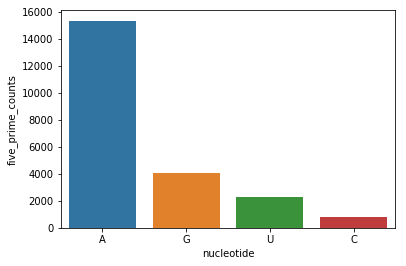

In [33]:
sns.barplot(data=counts,x="nucleotide",y="five_prime_counts")

# Next exercise: making a function out of these steps
It should:
1. Take a Shortstack result file as input
2. Returns a figure object that can be printed

In [ ]:
def create_barplot_five_prime_nucleotide(shortstack_result_dataframe):
    "reads a ShortStack result dataframe and counts the number of A/C/G/U of the Major RNA 5' nucleotides"
    df = pd.read_csv(shortstack_result_dataframe,sep="\t")
    majorRNAs = df['MajorRNA'].tolist()
    five_prime_nucleotides = [seq[0] for seq in majorRNAs]
    # counts occurences of nucleotides
    cnt = Counter(five_prime_nucleotides)
    # creates a dictionary from the counter
    cnt_dict = {}
    for key, value in cnt.items():
        cnt_dict[key] = value
        cnt_dict
    # converts the dictoinary into a dataframe
    counts = pd.DataFrame.from_dict(cnt_dict,orient="index")
    counts = counts.reset_index()
    counts.columns=["nucleotide","five_prime_counts"]
